# Multivariate Linear Regression

Multivariate linear regression is a statistical method used to model the relationship between multiple independent variables and a single dependent variable. It is an extension of simple linear regression, which only involves one independent variable. In multivariate linear regression, the goal is to find the equation that best predicts the value of the dependent variable based on the values of the independent variables. The equation is in the form of Y = a + b1X1 + b2X2 + ... + bnXn, where Y is the dependent variable, X1, X2, ..., Xn are the independent variables, a is the constant term, and b1, b2, ..., bn are the coefficients that represent the relationship between each independent variable and the dependent variable.

# What we do in this?

We accurately predict charges cost?

Columns present in dataset:

`age`: age of primary beneficiary

`sex`: insurance contractor gender, female, male

`bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

`children`: Number of children covered by health insurance / Number of dependents

`smoker`: Smoking

`region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

`charges`: Individual medical costs billed by health insurance

# Importing Important libreries

In [55]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt

# Reading files
Below code uses the `read_csv()` function from the pandas library to read in the medical insurence data from a csv file and assigns the resulting dataframe to a variable named `df`.

In [56]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Feature engineering
Next, we applies one-hot encoding to the `sex`, `region`, and `smoker` columns of the dataframe and assigns the resulting dataframe to a new variable `df_encoded`.

In [57]:
# Apply one-hot encoding to "color" column
df_encoded = pd.get_dummies(df, columns=['sex', 'region', 'smoker'])
df_encoded

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,1,0,0,1,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0,1,0
1335,18,36.850,0,1629.83350,1,0,0,0,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,0,0,0,1,1,0


In [58]:
df_encoded.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'smoker_no', 'smoker_yes'],
      dtype='object')

# Feature selection
Next, the code selects the relevant columns of the encoded dataframe to use as independent variables (X) and the dependent variable (y) for the linear regression model.

In [59]:
X = df_encoded[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'smoker_no', 'smoker_yes']]
y = df_encoded['charges']

# Preparing model

Below code splits the data into training and testing sets using the train_test_split function, fits the linear regression model using the training data and prints the MSE of the model.

In [60]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
# create a linear regression model
model = LinearRegression()

In [62]:
# train the model on the training data
train_loss = []
test_loss = []

# train the model
for i in range(100):
    model.fit(X_train, y_train)
    train_loss.append(mean_squared_error(y_train, model.predict(X_train)))
    test_loss.append(mean_squared_error(y_test, model.predict(X_test)))

In [63]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [64]:
# predict the values for the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

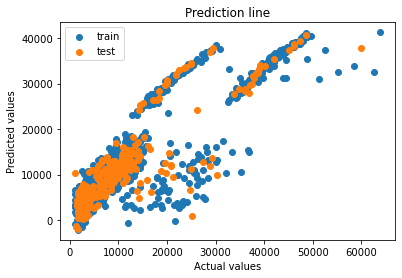

In [65]:
# Plot the prediction line
plt.scatter(y_train, y_train_pred,label='train')
plt.scatter(y_test, y_test_pred,label='test')
plt.legend()
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Prediction line")
plt.show()

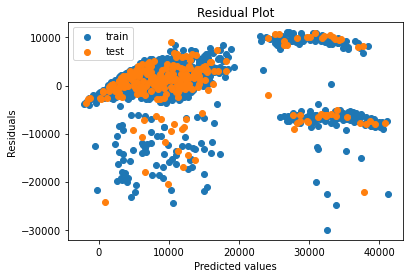

In [66]:
# Plot the residuals
plt.scatter(y_train_pred, y_train_pred - y_train,label='train')
plt.scatter(y_test_pred, y_test_pred - y_test,label='test')
plt.legend()
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

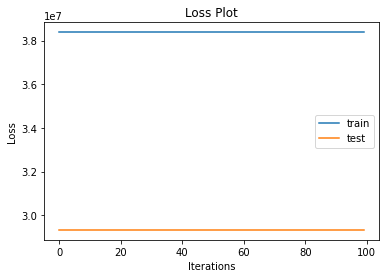

In [67]:
# Plot the loss
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.show()

Overall, this code is performing a linear regression analysis on an insurance dataset. It begins by importing the necessary libraries for the analysis, then reads in the data from a csv file using pandas, applies one-hot encoding to certain columns, selects the relevant columns to use in the model, and finally splits the data into training and testing sets and fits a linear regression model to the training data. The last line prints the MSE of the model as a measure of performance.